# 🧠 Edge Detection in Images

[Edge detection](https://learnopencv.com/edge-detection-using-opencv/) is a crucial step in many computer vision and image processing tasks. It helps in identifying the boundaries of objects within images by detecting intensity changes.

In this notebook, we will explore four popular edge detection techniques:

- **Laplacian**: Computes the second derivative of the image. It highlights regions of rapid intensity change.
- **Sobel X**: Detects horizontal edges by calculating the gradient in the x-direction.
- **Sobel Y**: Detects vertical edges by calculating the gradient in the y-direction.
- **Canny Edge Detection**: A multi-stage algorithm that provides optimal edge detection.

---
<div style="text-align: center;">
  <a href="https://colab.research.google.com/github/MinooSdpr/opencv-python-tutorial/blob/main/Opencv-05.ipynb">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" />
  </a>
  &nbsp;
  <a href="https://github.com/MinooSdpr/opencv-python-tutorial/blob/main/Opencv-05.ipynb">
    <img src="https://img.shields.io/badge/Open%20in-GitHub-24292e?logo=github&logoColor=white" alt="Open In GitHub" />
  </a>
</div>

## 🧼 What is `cv.GaussianBlur()`?

`cv.GaussianBlur()` is a function in OpenCV used to apply **Gaussian smoothing** (or blurring) to an image. This type of filter is widely used to **reduce image noise and detail**, which is especially helpful before performing operations like **edge detection**.

The idea is to smooth the image by averaging pixel values with a **weighted kernel**, where closer pixels contribute more to the average than those further away. The weights follow a Gaussian (bell-shaped) distribution.

---

### 📌 Why Use It?

Before applying edge detection algorithms, especially **Laplacian**, **Sobel**, or **Canny**, it’s important to reduce random noise that might falsely appear as edges. Gaussian Blur helps to:

* Suppress high-frequency noise.
* Make edges more coherent.
* Prevent false detections due to noise.

---


### 📊 Parameter Table

| Parameter            | Type              | Description                                                                                       |
| -------------------- | ----------------- | ------------------------------------------------------------------------------------------------- |
| `src`                | `ndarray`         | Source image (usually in grayscale or color).                                                     |
| `ksize`              | `tuple(int, int)` | Size of the Gaussian kernel. Both width and height must be odd and positive (e.g., (3,3), (5,5)). |
| `sigmaX`             | `float`           | Standard deviation in the X direction. If set to 0, it's computed from `ksize`.                   |
| `dst` *(opt)*        | `ndarray`         | Output image of the same size and type as `src`. If not provided, a new one is created.           |
| `sigmaY` *(opt)*     | `float`           | Standard deviation in the Y direction. If 0, it is set equal to `sigmaX`.                         |
| `borderType` *(opt)* | `int`             | Pixel extrapolation method. Common default: `cv.BORDER_DEFAULT`.                                  |

---

### 📎 Example Visualization

Here's a conceptual illustration of what a **3x3 Gaussian kernel** looks like:

```
[1 2 1]
[2 4 2]   → normalized to sum = 16
[1 2 1]
```

Each value is a **weight**. The center pixel has the highest weight, and surrounding pixels contribute less to the average.

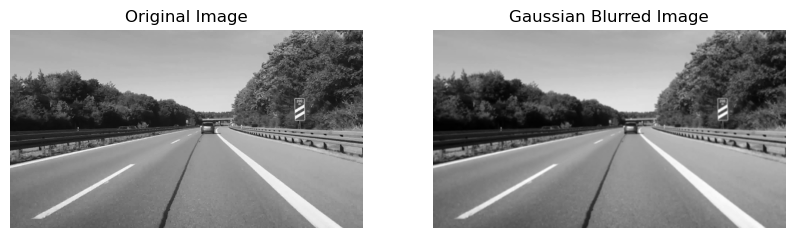

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

image = cv.imread('lane_detection.jpg', 0)

image_noise_removed = cv.GaussianBlur(image, (3,3), 0)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Gaussian Blurred Image")
plt.imshow(image_noise_removed, cmap='gray')
plt.axis('off')
plt.show()

## ⚙️ What is `cv.Laplacian()`?

`cv.Laplacian()` is an OpenCV function used to apply the **Laplacian operator**, a second-order derivative operator that highlights **areas of rapid intensity change** — i.e., edges.

The Laplacian detects edges **regardless of direction** (unlike Sobel, which detects specific orientations like horizontal or vertical). It's often used to find general outlines or contours in an image.

---

### 🧠 Why Use the Laplacian?

* It captures **both horizontal and vertical edges** simultaneously.
* It emphasizes **regions with strong gradients**.
* It's sensitive to **noise**, so it’s best used **after smoothing** (e.g., with Gaussian blur).

---

### 📊 Parameter Table:

| Parameter            | Type      | Description                                                                                        |
| -------------------- | --------- | -------------------------------------------------------------------------------------------------- |
| `src`                | `ndarray` | Input image (grayscale or color).                                                                  |
| `ddepth`             | `int`     | Desired depth of the output image. Use `cv.CV_64F` to avoid overflow and preserve negative values. |
| `dst` *(opt)*        | `ndarray` | Output image of the same size as `src`.                                                            |
| `ksize` *(opt)*      | `int`     | Aperture size of the Sobel kernel used internally. Must be odd (e.g., 1, 3, 5). Default is 1.      |
| `scale` *(opt)*      | `float`   | Optional scale factor for the computed Laplacian values. Default is 1.                             |
| `delta` *(opt)*      | `float`   | Optional bias added to the result. Default is 0.                                                   |
| `borderType` *(opt)* | `int`     | Pixel extrapolation method. Common default: `cv.BORDER_DEFAULT`.                                   |

---

### ⚠️ About `CV_64F` and Negative Values

The Laplacian operator computes second-order derivatives, which often produce **negative values**. Using `cv.CV_64F` avoids clamping and ensures:

* Negative edges (dark-to-light) are preserved.
* Positive edges (light-to-dark) are preserved.
* You're not losing information due to 8-bit overflow.

#### ✅ Common Values for `ddepth` in OpenCV

| Value       | Description             | Bit Depth | Signed? | Typical Use Case                                        |
| ----------- | ----------------------- | --------- | ------- | ------------------------------------------------------- |
| `cv.CV_8U`  | 8-bit unsigned integer  | 8-bit     | No      | For final display (after processing)                    |
| `cv.CV_16U` | 16-bit unsigned integer | 16-bit    | No      | Rarely used for gradients                               |
| `cv.CV_16S` | 16-bit signed integer   | 16-bit    | Yes     | For intermediate gradient calculations                  |
| `cv.CV_32F` | 32-bit float            | 32-bit    | Yes     | For high-precision gradient operations                  |
| `cv.CV_64F` | 64-bit float            | 64-bit    | Yes     | Maximum precision (e.g. scientific or exact processing) |

---

#### 📌 Recommended Choices for Edge Detection

| Operation         | Recommended `ddepth` | Why                                              |
| ----------------- | -------------------- | ------------------------------------------------ |
| Sobel / Laplacian | `cv.CV_64F`          | Preserves sign, avoids overflow                  |
| Sobel / Laplacian | `cv.CV_16S`          | More efficient than 64F, still preserves sign    |
| Final display     | `cv.CV_8U`           | For showing results as images (after conversion) |

---

### 📎 Visual Example (Conceptual)

In a simplified 1D signal, Laplacian highlights edges as **peaks of curvature**:

```
Input:      [0 0 50 255 50 0 0]
Gradient:        ^    v        ← edges
Laplacian:   0  + +   -  -  0   ← second derivative
```


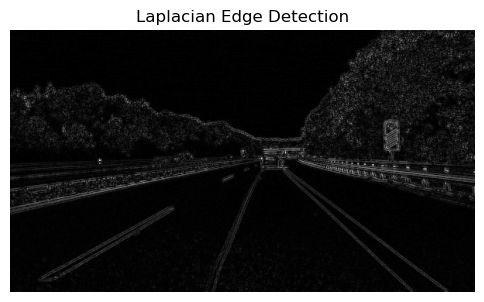

In [2]:
laplacian = cv.Laplacian(image_noise_removed, cv.CV_64F)

plt.figure(figsize=(6,4))
plt.title("Laplacian Edge Detection")
plt.imshow(np.abs(laplacian), cmap='gray')
plt.axis('off')
plt.show()

## ↔️ What is `cv.Sobel()`?

`cv.Sobel()` is an OpenCV function that calculates the **first-order image derivative** using the **Sobel operator**, which is a combination of **Gaussian smoothing** and **differentiation**.

This operator highlights regions in the image where intensity values change significantly — i.e., **edges**.

* It detects **directional edges** (horizontal or vertical).
* It's more noise-resistant than the basic gradient operator due to built-in smoothing.

---

### 🧠 Why Use Sobel?

Sobel is commonly used to find:

* **Vertical edges** (using `dx=0, dy=1`)
* **Horizontal edges** (using `dx=1, dy=0`)
* Or both (by combining `sobelx` and `sobely`)

It’s preferred over simple finite difference because it **smooths** the image while computing the derivative, reducing noise sensitivity.

---

### 📊 Parameter Table:

| Parameter            | Type      | Description                                                                  |
| -------------------- | --------- | ---------------------------------------------------------------------------- |
| `src`                | `ndarray` | Input image (grayscale or color).                                            |
| `ddepth`             | `int`     | Desired depth of the output image (`CV_64F` to preserve negative gradients). |
| `dx`                 | `int`     | Order of the derivative in x-direction. Use `1` for Sobel X.                 |
| `dy`                 | `int`     | Order of the derivative in y-direction. Use `1` for Sobel Y.                 |
| `dst` *(opt)*        | `ndarray` | Output image (same size as `src`).                                           |
| `ksize` *(opt)*      | `int`     | Kernel size. Must be 1, 3, 5, or 7. Larger sizes increase smoothing.         |
| `scale` *(opt)*      | `float`   | Optional scale factor for result. Default is 1.                              |
| `delta` *(opt)*      | `float`   | Optional value added to the result. Default is 0.                            |
| `borderType` *(opt)* | `int`     | Border extrapolation method (default: `cv.BORDER_DEFAULT`).                  |

---

### ➕ Example: How Sobel X Works

When you set `dx=1`, `dy=0`, the Sobel operator uses a kernel like:

```
[-1  0  +1]
[-2  0  +2]
[-1  0  +1]
```

This detects **horizontal edges** (intensity changes across the x-axis).

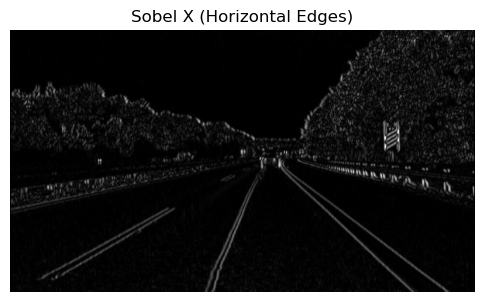

In [3]:
sobelx = cv.Sobel(image_noise_removed, cv.CV_64F, 1, 0, ksize=3)

plt.figure(figsize=(6,4))
plt.title("Sobel X (Horizontal Edges)")
plt.imshow(np.abs(sobelx), cmap='gray')
plt.axis('off')
plt.show()

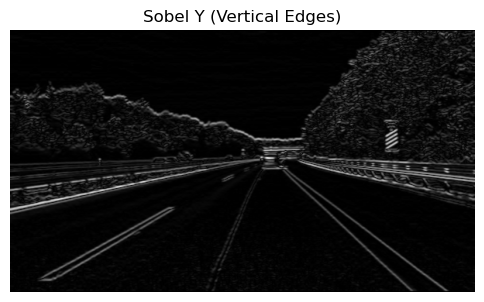

In [4]:
sobely = cv.Sobel(image_noise_removed, cv.CV_64F, 0, 1, ksize=3)

plt.figure(figsize=(6,4))
plt.title("Sobel Y (Vertical Edges)")
plt.imshow(np.abs(sobely), cmap='gray')
plt.axis('off')
plt.show()


## ⚡ What is `cv.Canny()`?

`cv.Canny()` is a popular and powerful edge detection function in OpenCV. It implements the **Canny Edge Detection Algorithm**, which is a **multi-stage process** designed to extract sharp, clean edges from images.

Compared to operators like **Sobel** or **Laplacian**, which are based on derivatives, **Canny** combines gradient detection with **noise filtering** and **edge linking**, making it more robust and accurate.

---

### 🧠 Why Use Canny?

* Produces **thin, clean, and well-connected edges**.
* Includes **non-maximum suppression** to eliminate spurious edge responses.
* Uses **hysteresis thresholding**, which helps preserve real edges while filtering noise.

> Note: Canny does **not** take a `ddepth` parameter because it returns a **binary image** with edges marked as white (255) and non-edges as black (0).

---

### 📊 Parameter Table:

| Parameter              | Type      | Description                                                                                                                     |   |   |   |                         |
| ---------------------- | --------- | ------------------------------------------------------------------------------------------------------------------------------- | - | - | - | ----------------------- |
| `image`                | `ndarray` | Input 8-bit grayscale image. Should be blurred (e.g., with GaussianBlur).                                                       |   |   |   |                         |
| `threshold1`           | `float`   | Lower threshold for the **hysteresis** procedure.                                                                               |   |   |   |                         |
| `threshold2`           | `float`   | Upper threshold. Strong edges above this are kept. Weak edges between thresholds are kept **only if** connected to strong ones. |   |   |   |                         |
| `edges` *(opt)*        | `ndarray` | Output edge map (same size as input).                                                                                           |   |   |   |                         |
| `apertureSize` *(opt)* | `int`     | Aperture size for the Sobel operator (default is 3).                                                                            |   |   |   |                         |
| `L2gradient` *(opt)*   | `bool`    | If `True`, uses the more accurate L2 norm (`sqrt(x² + y²)`); otherwise, uses L1 norm (`                                         | x | + | y | `). Default is `False`. |

---

### 📌 What Are the Two Thresholds?

The Canny algorithm uses **hysteresis thresholding** with two thresholds:

* **Upper Threshold**: Strong edge — definitely an edge.
* **Lower Threshold**: Weak edge — considered an edge **only** if connected to a strong edge.
* Values below the lower threshold are **ignored completely**.

> In your example:
>
> * `100` = weak edge threshold
> * `200` = strong edge threshold

Choosing the right thresholds is critical and depends on the image.



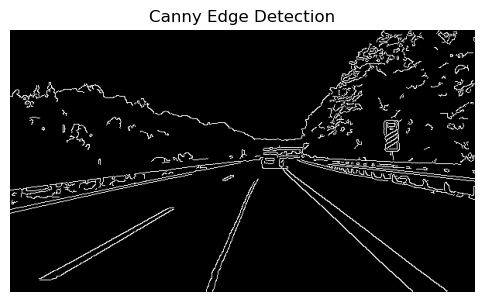

In [5]:
canny = cv.Canny(image_noise_removed, 100, 200)

plt.figure(figsize=(6,4))
plt.title("Canny Edge Detection")
plt.imshow(canny, cmap='gray')
plt.axis('off')
plt.show()

<div style="float:right;">
  <a href="https://github.com/MinooSdpr/opencv-python-tutorial/blob/main/Opencv-06.ipynb"
     style="
       display:inline-block;
       padding:8px 20px;
       background-color:#414f6f;
       color:white;
       border-radius:12px;
       text-decoration:none;
       font-family:sans-serif;
       transition:background-color 0.3s ease;
     ">
    ▶️ Next
  </a>
</div>